# TextWorld 101



## Environment setup

* TextWorld (I used my branch instead of microsoft upstream version [here](https://github.com/Microsoft/TextWorld) to freeze TextWorld, as it is being actively developed)
* pytorch
* ptan

Note: you should not restart the runtime after the next cell (ignore if it will ask you to do so), but you **have to** restart the runtime after the following cell, otherwise textworld won't work.

Those cells need to be run only once after the runtime reset or fresh load.

In [0]:
!pip install git+https://github.com/Shmuma/TextWorld > /dev/null 2>&1
!pip install ptan > /dev/null 2>&1
!pip3 install torch torchvision > /dev/null 2>&1

In [2]:
# Juggling around colab requirement
!pip uninstall -y prompt-toolkit > /dev/null 2>&1
!pip install prompt-toolkit==1.0.16
# DO NOT FORGET to restart runtime as suggested

     |████████████████████████████████| 245kB 6.8MB/s 
ERROR: textworld 1.1.1 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.16 which is incompatible.
ERROR: jupyter-console 6.0.0 has requirement prompt-toolkit<2.1.0,>=2.0.0, but you'll have prompt-toolkit 1.0.16 which is incompatible.


## Imports

In [0]:
import gym
import textworld.gym as tw_gym

## Build games we'll play with

TextWorld allows to generate games of specific complexity, which makes it great for experimentation, learning and reasearch, as we can gradually increase complexity of problems.

Below we generate the problem with 10 objects, 5 rooms and quest length 5

In [2]:
!tw-make custom --world-size 5 --nb-objects 10 --quest-length 5 --seed 1234 --output simple1.ulx
!ls -l

Global seed: 1234
Game generated: /content/simple1.ulx
total 660
drwxr-xr-x 1 root root   4096 May 31 16:17 sample_data
-rw-r--r-- 1 root root  32067 Jun 19 14:10 simple1.json
-rw-r--r-- 1 root root  26000 Jun 19 14:10 simple1.ni
-rw-r--r-- 1 root root 608512 Jun 19 14:10 simple1.ulx



## Env capabilities

Explore textworld gym environment


In [0]:
env_id = tw_gym.register_game("simple1.ulx")
env = gym.make(env_id)

In [4]:
env.observation_space, env.action_space

(Word(L=200, V=1249), Word(L=8, V=1249))

In [5]:
env.observation_space.vocab[:10]

['<PAD>', '<UNK>', '</S>', '<S>', '<|>', '', '0', '1', '10', '100']

In [6]:
r = env.reset()
r

("\n\n\n                    ________  ________  __    __  ________        \n                   |        \\|        \\|  \\  |  \\|        \\       \n                    \\$$$$$$$$| $$$$$$$$| $$  | $$ \\$$$$$$$$       \n                      | $$   | $$__     \\$$\\/  $$   | $$          \n                      | $$   | $$  \\     >$$  $$    | $$          \n                      | $$   | $$$$$    /  $$$$\\    | $$          \n                      | $$   | $$_____ |  $$ \\$$\\   | $$          \n                      | $$   | $$     \\| $$  | $$   | $$          \n                       \\$$    \\$$$$$$$$ \\$$   \\$$    \\$$          \n              __       __   ______   _______   __        _______  \n             |  \\  _  |  \\ /      \\ |       \\ |  \\      |       \\ \n             | $$ / \\ | $$|  $$$$$$\\| $$$$$$$\\| $$      | $$$$$$$\\\n             | $$/  $\\| $$| $$  | $$| $$__| $$| $$      | $$  | $$\n             | $$  $$$\\ $$| $$  | $$| $$    $$| $$      | $$  | $$\n         

In [7]:
print(r[0])




                    ________  ________  __    __  ________        
                   |        \|        \|  \  |  \|        \       
                    \$$$$$$$$| $$$$$$$$| $$  | $$ \$$$$$$$$       
                      | $$   | $$__     \$$\/  $$   | $$          
                      | $$   | $$  \     >$$  $$    | $$          
                      | $$   | $$$$$    /  $$$$\    | $$          
                      | $$   | $$_____ |  $$ \$$\   | $$          
                      | $$   | $$     \| $$  | $$   | $$          
                       \$$    \$$$$$$$$ \$$   \$$    \$$          
              __       __   ______   _______   __        _______  
             |  \  _  |  \ /      \ |       \ |  \      |       \ 
             | $$ / \ | $$|  $$$$$$\| $$$$$$$\| $$      | $$$$$$$\
             | $$/  $\| $$| $$  | $$| $$__| $$| $$      | $$  | $$
             | $$  $$$\ $$| $$  | $$| $$    $$| $$      | $$  | $$
             | $$ $$\$$\$$| $$  | $$| $$$$$$$\| $$      | $

In [8]:
r[1:]

({},)

So, TextWorld env is **incompatible** with gym api, as `reset()` returns tuple with observation string and extended info dict. This is not a bug, but a feature -- gym provides no way to get the extended info for initial observation.

We need to take this into account on observation preprocessing.

In [9]:
r1 = env.step('go east')
r1

('You have to open the gate first.\n\n', 0, False, {})

In [10]:
print(r1[0])

You have to open the gate first.




## Extended attributes

TextWorld can provide us information in a more structured way, giving information about admissible commands, intermediate reward, inventory and even path to solution.

To get it, we need to pass specific flags on environment creation.

Below we'll ask about specific flags I find useful, full set of them is here: https://github.com/microsoft/TextWorld/blob/04952aa64c4612309a7296aef99867ecfa5c7db1/textworld/envs/wrappers/filter.py

In addition, we can limit amount of steps agent can do and redefine the name of gym env which will be registered.

In [11]:
from textworld.envs.wrappers.filter import EnvInfos

EXTRA_GAME_INFO = {
    "inventory": True,
    "description": True,
    "intermediate_reward": True,
    "admissible_commands": True,
    "policy_commands": True,
}

env_id = tw_gym.register_game("simple1.ulx", max_episode_steps=10,
                                  name="simple1", request_infos=EnvInfos(**EXTRA_GAME_INFO))
env_id

'tw-simple1-v0'

In [0]:
env = gym.make(env_id)

In [13]:
r = env.reset()
r[1]

{'admissible_commands': ['drop keycard',
  'drop ladle',
  'examine door',
  'examine gate',
  'examine keycard',
  'examine ladle',
  'examine rack',
  'inventory',
  'look',
  'open door',
  'put keycard on rack',
  'put ladle on rack',
  'unlock gate with keycard'],
 'description': "-= Scullery =-\nYou've just shown up in a scullery. You begin to take stock of what's here.\n\nHey, want to see a rack? Look over there, a rack. The rack is ordinary. Unfortunately, there isn't a thing on it.\n\nThere is a closed gate leading east. There is a closed door leading south.\n\n\n",
 'intermediate_reward': 0,
 'inventory': 'You are carrying:\n  a keycard\n  a ladle\n\n\n',
 'policy_commands': ['unlock gate with keycard',
  'open gate',
  'go east',
  'take cookie from counter',
  'eat cookie']}

The dict returned by env contains the following fields:


*   `admissible_commands`: list of commands (=actions) we can execute from the current state
*   `description`: generic description of the scene (observation)
* `intermediate_reward`: additional reward showing us we're on the right or wrong track upon solution. TextWorld description says it equals +1 every time path to the solution becomes shorter and -1 if we do something which pushes us away from final game goal
* `inventory`: description of things you're carrying
* `policy_commands`: list of commands we need to execute to get to the goal from the current state. We're not going to use this information during the training.




## Observations and actions

Both observation and action space are of new `Word` class, which is an extension of TextWorld, representing variable-length sequence of words from some vocabulary.

Code is here: https://github.com/microsoft/TextWorld/blob/40e13d9bd1d3bb64a98504a8d50d8873884cc08c/textworld/gym/spaces/text_spaces.py#L86

In [15]:
env.observation_space

Word(L=200, V=1249)

In [16]:
tokens = env.observation_space.tokenize("You find yourself in a scullery")
tokens

array([   3, 1239,  407, 1245,  558,   35,  919,    2])

In [17]:
env.observation_space.vocab[:4]

['<PAD>', '<UNK>', '</S>', '<S>']

In [18]:
[env.observation_space.vocab[t] for t in tokens]

['<S>', 'you', 'find', 'yourself', 'in', 'a', 'scullery', '</S>']

# Baseline DQN agent

First step will be the DQN which takes the state description and one of the commands from 'admissible commands' list and estimate Q-value using the Bellman equation.

---

![alt text](https://raw.githubusercontent.com/Shmuma/rlss2019-hands-on/textworld/imgs/RLSS-TW-arch.png)

## Preprocessor pipeline

Before we can start training the agent, we need to convert the data into NN-friendly form. DQN net accepts the fixed-sized vector which encodes state description and command we're going to execute.

Preprocessing consists of several steps:
* from raw strings given by environment to sequence of token ids -- indices in underlying vocabulary. This step is already implemented by TextWorld in `Word.tokenize()` method, but we need to implement its call in a convenient and flexible way.
* every token in sequence should be encoded into dense vector using so called *Embeddings*, which is a standard NLP practice to get from individual sequence entries into NN representation. You can take pre-trained embeddings or train your own using word2vec or glove methods. In our demo we go with third way: train embeddings as part of our model.
* Embeddings convert every token in sequence into dense vector of fixed size, but the sequence as a whole still has variable length. To deal with that variability we'll use RNNs, which, being applied to input sequence can encode it into fixed size vector, capturing the squence as a whole. This step is labelled as Encoders on the diagram above. We'll train invidiual encoder for every input sequence.
* Every encoder outputs fixed-size vector capturing the specifics from the sequence, so we just concatenate them together to get single fixed-size input to DQN network.



In [0]:
import ptan
import random
import pathlib
import logging
import numpy as np
from typing import Tuple, List, Iterable, Optional, Any
from textworld.gym import spaces as tw_spaces
from textworld.envs.wrappers.filter import EnvInfos

## Env encoder wrapper

To simplify further experiments, below is the wrapper around TextWorld environment which transforms the observations using `Word.tokenize()` method


In [0]:
STEPS_LIMIT = 50
GAME_FILE = "simple1.ulx"

EXTRA_GAME_INFO = {
  "inventory": True,
  "description": True,
  "intermediate_reward": True,
  "admissible_commands": True,
}


def make_env():
  game_path = pathlib.Path(GAME_FILE)
  env_id = tw_gym.register_game(
      str(game_path), max_episode_steps=STEPS_LIMIT,
      name=game_path.stem, request_infos=EnvInfos(**EXTRA_GAME_INFO))
  env = gym.make(env_id)
  return env

In [21]:
env = make_env()
env
  

<TimeLimit<TextworldGamesEnv<tw-simple1-v1>>>

In [0]:
class TextWorldPreproc(gym.Wrapper):
    """
    Simple wrapper to preprocess text_world game observation
    """
    log = logging.getLogger("TextWorldPreproc")
    
    def __init__(self, env: gym.Env, encode_raw_text: bool = False,
                 encode_extra_fields: Iterable[str] = ('description', 'inventory'),
                 use_admissible_commands: bool = True,
                 use_intermediate_reward: bool = True,
                 tokens_limit: Optional[int] = None):
        """
        :param env: env to be wrapped. Has to provide Word observations
        :param encode_raw_text: do we need to encode raw observation from environment, if true, adds an extra encoder
        :param encode_extra_fields: tuple of field names to be encoded, expected to be string values
        :param use_admissible_commands: if true, admissible commands used for action wrapping
        :param use_intermediate_reward: take intermediate reward into account
        :param tokens_limit: optional limit of tokens in the encoded fields
        """
        super(TextWorldPreproc, self).__init__(env)
        if not isinstance(env.observation_space, tw_spaces.Word):
            raise ValueError("Env should expose text_world compatible observation space, "
                             "this one gives %s" % env.observation_space)
        self._encode_raw_text = encode_raw_text
        self._encode_extra_field = tuple(encode_extra_fields)
        self._use_admissible_commands = use_admissible_commands
        self._use_intermedate_reward = use_intermediate_reward
        self._num_fields = len(self._encode_extra_field) + int(self._encode_raw_text)
        self._last_admissible_commands = None
        self._last_extra_info = None
        self._tokens_limit = tokens_limit
        self._cmd_hist = []

    @property
    def num_fields(self):
        return self._num_fields

    def _encode(self, obs: str, extra_info: dict) -> dict:
        obs_result = []
        if self._encode_raw_text:
            tokens = self.env.observation_space.tokenize(obs)
            if self._tokens_limit is not None:
                tokens = tokens[:self._tokens_limit]
            obs_result.append(tokens)
        for field in self._encode_extra_field:
            tokens = self.env.observation_space.tokenize(extra_info[field])
            if self._tokens_limit is not None:
                tokens = tokens[:self._tokens_limit]
            obs_result.append(tokens)
        result = {"obs": obs_result}
        if self._use_admissible_commands:
            adm_result = []
            for cmd in extra_info['admissible_commands']:
                adm_result.append(self.env.action_space.tokenize(cmd))
            result['admissible_commands'] = adm_result
            self._last_admissible_commands = extra_info['admissible_commands']
        self._last_extra_info = extra_info
        return result

    # TextWorld environment has a workaround of gym drawback: 
    # reset returns tuple with raw observation and extra dict
    def reset(self):
        res = self.env.reset()
        self._cmd_hist = []
        return self._encode(res[0], res[1])

    def step(self, action):
        if self._use_admissible_commands:
            action = self._last_admissible_commands[action]
            self._cmd_hist.append(action)
        obs, r, is_done, extra = self.env.step(action)
        if self._use_intermedate_reward:
            r += extra.get('intermediate_reward', 0)
        new_extra = dict(extra)
        for f in self._encode_extra_field + ('admissible_commands', 'intermediate_reward'):
            if f in new_extra:
                new_extra.pop(f)
        # if is_done:
        #     self.log.info("Commands: %s", self._cmd_hist)
        #     self.log.info("Reward: %s, extra: %s", r, new_extra)
        return self._encode(obs, extra), r, is_done, new_extra

    @property
    def last_admissible_commands(self):
        return tuple(self._last_admissible_commands) if self._last_admissible_commands else None

    @property
    def last_extra_info(self):
        return self._last_extra_info


In [23]:
e = TextWorldPreproc(env)
e

<TextWorldPreproc<TimeLimit<TextworldGamesEnv<tw-simple1-v1>>>>

Preprocessor applies tokenisation to original environment observations and repacks it into dict with two fileds: `admissible_commands`, which is a list of commands to take and `obs` list, keeping tokenised sequences building up our observation. 

Let's check how it works

In [24]:
r = e.reset()
r

{'admissible_commands': [array([  3, 341, 589,   2]),
  array([  3, 341, 599,   2]),
  array([  3, 382, 333,   2]),
  array([  3, 382, 452,   2]),
  array([  3, 382, 589,   2]),
  array([  3, 382, 599,   2]),
  array([  3, 382, 860,   2]),
  array([  3, 574,   2]),
  array([  3, 647,   2]),
  array([  3, 762, 333,   2]),
  array([  3, 854, 589, 755, 860,   2]),
  array([  3, 854, 599, 755, 860,   2]),
  array([   3, 1137,  452, 1211,  589,    2])],
 'obs': [array([   3,  919,    1,  584,  948, 1144,  558,   35,  919,    2,    3,
         1239,  126, 1102, 1052, 1012,  746,    1,  523,    2,    3,  525,
         1177, 1102,  925,   35,  860,  647,  776, 1081,   35,  860,    2,
            3, 1078,  860,  577,  770,    2,    3, 1135, 1081,    1,   35,
         1084,  755,  579,    2,    3, 1081,  577,   35,  235,  452,  613,
          352,    2,    3, 1081,  577,   35,  235,  333,  613,  986,    2,
            3,    2]),
  array([   3, 1239,   78,    1,   35,  589,   35,  599,    2])]}

Besides transformed observations, the wrapper keeps two fields: `last_extra_info` with raw untransformed state from TextWorld environment and `last_admissible_commands` with list of text commands available. They are useful for debugging

In [0]:
e.last_extra_info

{'admissible_commands': ['drop keycard',
  'drop ladle',
  'examine door',
  'examine gate',
  'examine keycard',
  'examine ladle',
  'examine rack',
  'inventory',
  'look',
  'open door',
  'put keycard on rack',
  'put ladle on rack',
  'unlock gate with keycard'],
 'description': "-= Scullery =-\nYou've just shown up in a scullery. You begin to take stock of what's here.\n\nHey, want to see a rack? Look over there, a rack. The rack is ordinary. Unfortunately, there isn't a thing on it.\n\nThere is a closed gate leading east. There is a closed door leading south.\n\n\n",
 'intermediate_reward': 0,
 'inventory': 'You are carrying:\n  a keycard\n  a ladle\n\n\n'}

In [0]:
e.step(e.last_admissible_commands.index('unlock gate with keycard'))

({'admissible_commands': [array([  3, 341, 589,   2]),
   array([  3, 341, 599,   2]),
   array([  3, 382, 333,   2]),
   array([  3, 382, 452,   2]),
   array([  3, 382, 589,   2]),
   array([  3, 382, 599,   2]),
   array([  3, 382, 860,   2]),
   array([  3, 574,   2]),
   array([   3,  638,  452, 1211,  589,    2]),
   array([  3, 647,   2]),
   array([  3, 762, 333,   2]),
   array([  3, 762, 452,   2]),
   array([  3, 854, 589, 755, 860,   2]),
   array([  3, 854, 599, 755, 860,   2])],
  'obs': [array([   3,  919,    1,  584,  948, 1144,  558,   35,  919,    2,    3,
          1239,  126, 1102, 1052, 1012,  746,    1,  523,    2,    3,  525,
          1177, 1102,  925,   35,  860,  647,  776, 1081,   35,  860,    2,
             3, 1078,  860,  577,  770,    2,    3, 1135, 1081,    1,   35,
          1084,  755,  579,    2,    3, 1081,  577,   35,  235,  452,  613,
           352,    2,    3, 1081,  577,   35,  235,  333,  613,  986,    2,
             3,    2]),
   array([   3,

Please note reward=1 (second entry in returned tuple) in the result above. That's due to `intermediate_reward` option set in the env, which gives us reward every time we do a step in the right direction. You can disable this to make problem harder.

In [0]:
e.last_extra_info

{'admissible_commands': ['drop keycard',
  'drop ladle',
  'examine door',
  'examine gate',
  'examine keycard',
  'examine ladle',
  'examine rack',
  'inventory',
  'lock gate with keycard',
  'look',
  'open door',
  'open gate',
  'put keycard on rack',
  'put ladle on rack'],
 'description': "-= Scullery =-\nYou've just shown up in a scullery. You begin to take stock of what's here.\n\nHey, want to see a rack? Look over there, a rack. The rack is ordinary. Unfortunately, there isn't a thing on it.\n\nThere is a closed gate leading east. There is a closed door leading south.\n\n\n",
 'intermediate_reward': 1,
 'inventory': 'You are carrying:\n  a keycard\n  a ladle\n\n\n'}

In [0]:
e.step(e.last_admissible_commands.index('open gate'))

({'admissible_commands': [array([  3, 234, 452,   2]),
   array([  3, 341, 589,   2]),
   array([  3, 341, 599,   2]),
   array([  3, 382, 333,   2]),
   array([  3, 382, 452,   2]),
   array([  3, 382, 589,   2]),
   array([  3, 382, 599,   2]),
   array([  3, 382, 860,   2]),
   array([  3, 465, 352,   2]),
   array([  3, 574,   2]),
   array([  3, 647,   2]),
   array([  3, 762, 333,   2]),
   array([  3, 854, 589, 755, 860,   2]),
   array([  3, 854, 599, 755, 860,   2])],
  'obs': [array([   3,  919,    1,  584,  948, 1144,  558,   35,  919,    2,    3,
          1239,  126, 1102, 1052, 1012,  746,    1,  523,    2,    3,  525,
          1177, 1102,  925,   35,  860,  647,  776, 1081,   35,  860,    2,
             3, 1078,  860,  577,  770,    2,    3, 1135, 1081,    1,   35,
          1084,  755,  579,    2,    3, 1081,  577,   63,  762,  452,  613,
           352,    2,    3, 1081,  577,   35,  235,  333,  613,  986,    2,
             3,    2]),
   array([   3, 1239,   78,    

In [0]:
e.last_extra_info

{'admissible_commands': ['close gate',
  'drop keycard',
  'drop ladle',
  'examine door',
  'examine gate',
  'examine keycard',
  'examine ladle',
  'examine rack',
  'go east',
  'inventory',
  'look',
  'open door',
  'put keycard on rack',
  'put ladle on rack'],
 'description': "-= Scullery =-\nYou've just shown up in a scullery. You begin to take stock of what's here.\n\nHey, want to see a rack? Look over there, a rack. The rack is ordinary. Unfortunately, there isn't a thing on it.\n\nThere is an open gate leading east. There is a closed door leading south.\n\n\n",
 'intermediate_reward': 1,
 'inventory': 'You are carrying:\n  a keycard\n  a ladle\n\n\n'}

In [0]:
e.step(e.last_admissible_commands.index('go east'))

({'admissible_commands': [array([  3, 234, 452,   2]),
   array([  3, 341, 589,   2]),
   array([  3, 341, 599,   2]),
   array([  3, 382, 269,   2]),
   array([  3, 382, 276,   2]),
   array([  3, 382, 452,   2]),
   array([  3, 382, 589,   2]),
   array([  3, 382, 599,   2]),
   array([  3, 382, 935,   2]),
   array([   3,  382, 1108,  506,    2]),
   array([  3, 465, 986,   2]),
   array([   3,  465, 1195,    2]),
   array([  3, 574,   2]),
   array([  3, 647,   2]),
   array([  3, 854, 589, 755, 276,   2]),
   array([  3, 854, 599, 755, 276,   2]),
   array([   3, 1052,  269,  441,  276,    2]),
   array([   3, 1052,  935,  441,  276,    2]),
   array([   3, 1052, 1108,  506,    2])],
  'obs': [array([   3,   92, 1239,  407, 1245,  558,   63,   92,    2,    3,   35,
           727,  590,  746,  810,    2,    3, 1239,  916, 1078,  893,  428,
            35,  276,   65, 1239,  407,   35,  276,    2,    3,  755, 1078,
           276, 1239,  199,  661,  774,   35,  269,   65,   35,  93

So, the observation from `TextWorldPreproc` is a dict with two keys: 
* `admissible_commands`: list of commands available in the current state. Index in this array is the action to be pased to `step()` function
* `obs`: list of arrays with sequences, by default `description` and `inventory`

## Preprocessor (practice)

The next steps in our pipeline are embeddings and encoders, you should implement using template code below. Class `Encoder` is simple wrapper around LSTM layer, and already provided.

In **tests** section, you find several use-cases of this class to check your functionality. 

In [0]:
import logging
import torch
import torch.nn as nn
import torch.nn.utils.rnn as rnn_utils
import torch.nn.functional as F
import numpy as np

In [0]:
class Encoder(nn.Module):
    """
    Takes input sequences (after embeddings) and returns the hidden state from LSTM
    """
    def __init__(self, emb_size: int, out_size: int):
        super(Encoder, self).__init__()

        self.net = nn.LSTM(input_size=emb_size, hidden_size=out_size, batch_first=True)

    def forward(self, x):
        self.net.flatten_parameters()
        _, hid_cell = self.net(x)
        # Warn: if bidir=True or several layers, sequeeze has to be changed!
        return hid_cell[0].squeeze(0)

Function `order_batch` is used to sort the batch of input sequences by descending of sequence length. This is a PyTorch requirement, which itself is imposed by low-level cudnn implementation.

`order_batch` sorts the input batch, returns it and in addition returns the indices of sequences to return the batch to the original order.

In [0]:
def order_batch(batch):
    """
    Order batch of sequences by sequence len and keep inverse
    :param batch: list of lists of items
    :return: Tuple[sorted batch, numpy array to return the order]
    """
    lens = list(map(len, batch))
    ord_idx = np.flip(np.argsort(lens, kind='stable'))
    ord_inv = np.argsort(ord_idx, kind='stable')
    ord_batch = [batch[idx] for idx in ord_idx]
    return ord_batch, ord_inv

Now, this is the class, you need to implement. Function `_apply_encoder` is the core of class functionality and should apply one `Encoder` instance to the batch of sequences. You should use function [`rnn_utils.pack_sequence`](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.rnn.pack_sequence) to obtain instance of [`PackedSequence` class](https://pytorch.org/docs/stable/nn.html#packedsequence). 

This might be tricky if you haven't played with PyTorch RNNs before, so, you probably should first try to apply simple RNN to small toy tensors to understand they idea. Those links are also could be useful:
* https://stackoverflow.com/questions/51030782/why-do-we-pack-the-sequences-in-pytorch
* https://discuss.pytorch.org/t/simple-working-example-how-to-use-packing-for-variable-length-sequence-inputs-for-rnn/2120
* https://www.kdnuggets.com/2018/06/taming-lstms-variable-sized-mini-batches-pytorch.html

In [0]:
class Preprocessor(nn.Module):
    """
    Takes batch of several input sequences and outputs their summary from one or many encoders
    """
    def __init__(self, dict_size: int, emb_size: int, num_sequences: int, enc_output_size: int):
        """
        :param dict_size: amount of words is our vocabulary
        :param emb_size: dimensionality of embeddings
        :param num_sequences: count of sequences
        :param enc_output_size: output from single encoder
        """
        super(Preprocessor, self).__init__()

        # TODO: construct the class
        # 1. create nn.Embedding layer
        # 2. build a list of Encoder instances for input sequences
        # 3. register them in the module using self.add_module() call
        # 4. create separate Encoder instance for command encoding
        raise NotImplementedError
        
    def encode_sequences(self, batches):
        """
        Encode batches of sequences. Input is a list of observations, each 
        observation is a list of sequences. Corresponding encoders should
        be applied to corresponding sequence.
        
        More concretely, if we have two sequences: 'description' and 'inventory',
        input could be:
        
        [
          [
            [tokens of "you are standing on a cliff"],
            [tokens of "you have an axe"]

          ],
          [
            [tokens of "you're in cosy chair"],
            [tokens of "you're holding cup of tea"]
          ]
        ]
        
        The output from every encoder should be concatenated, keeping batches 
        over the first dimension.
        
        Implemented properly, should be just call to _apply_encoder in a loop 
        with torch.cat() call
        
        :param batches: list of tuples with variable-length sequences of word ids
        :return: tensor with concatenated encoder outputs for every batch sample
        """
        raise NotImplementedError

    def encode_commands(self, batch):
        """
        Apply encoder to list of commands sequence.
        
        Should be just call to _apply_encoder()
        
        :param batch: list of lists of idx
        :return: tensor with encoded commands in original order
        """
        raise NotImplementedError
        
    def _apply_encoder(self, batch, encoder):
        """
        A bit tricky internal method which applies encoder to the batch (which
        is a list of variable-length sequences).
        
        You should use order_batch() function above (to properly sort the sequence),
        and rnn_utils.pack_sequence and rnn_utils.PackedSequence. Alternatively,
        you can use padding, but this will make the implementation less memory-efficient.
        
        And don't forget about embeddings!
        
        Output is a tensor of size (len(batch), encoder_out_dim)
        """
        raise NotImplementedError


### Tests

Several test cases for the code you've just written. Might be helpful to understand the inputs and outputs of the methods to be implemented, so, don't hesitate to study test cases!

In [0]:
# construct our preprocessor, vocab has 10 tokens, embeddings of size 5, two input sequences, Encoder should return vectors of size 7
prep = Preprocessor(dict_size=10, emb_size=5, num_sequences=2, enc_output_size=7)
prep

Preprocessor(
  (emb): Embedding(10, 5)
  (enc_0): Encoder(
    (net): LSTM(5, 7, batch_first=True)
  )
  (enc_1): Encoder(
    (net): LSTM(5, 7, batch_first=True)
  )
  (enc_commands): Encoder(
    (net): LSTM(5, 7, batch_first=True)
  )
)

In [0]:
# apply encoder to two sequences, should return 2x7 tensor
enc = Encoder(emb_size=5, out_size=7)
t = prep._apply_encoder([
    [1, 2, 3], [2],
], enc)
print(t)
assert t.size() == (2, 7)

tensor([[ 0.2047, -0.0103, -0.1646,  0.1190,  0.2260, -0.0132,  0.2552],
        [ 0.0952,  0.1719, -0.0816,  0.0340,  0.0970, -0.0745,  0.2033]],
       grad_fn=<IndexBackward>)


In [0]:
# same batch reversed should have reversed tensor
tt = prep._apply_encoder([
    [2],
    [1, 2, 3], 
], enc)
print(tt)
tn = t.detach().numpy()
ttn = tt.detach().numpy()
np.testing.assert_allclose(tn[0], ttn[1])
np.testing.assert_allclose(tn[1], ttn[0])

tensor([[ 0.0952,  0.1719, -0.0816,  0.0340,  0.0970, -0.0745,  0.2033],
        [ 0.2047, -0.0103, -0.1646,  0.1190,  0.2260, -0.0132,  0.2552]],
       grad_fn=<IndexBackward>)


In [0]:
# the same semantics as just encoder application, but encoder is different, so, numbers shouldn't match
ttt = prep.encode_commands([[1, 2, 3], [2]])
print(ttt)
assert t.size() == (2, 7)

tensor([[ 0.0931, -0.1730,  0.0878,  0.2355,  0.1928,  0.0060, -0.0471],
        [ 0.0445,  0.1387,  0.1410,  0.0521, -0.0650,  0.0325, -0.0029]],
       grad_fn=<IndexBackward>)


In [0]:
# encode sequences, now we have list of batches for every sequence
t = prep.encode_sequences([
    # obs1
    [[1,2,3], [2]],
    # obs2
    [[1,2,3], [2,2,2]],
])
print(t)

# the output shape should be [batch_size=2, encoder_size*num_sequences=7*2=14]
assert t.size() == (2, 14)
# another subtle property is that both observation have the same first sequence, 
# first 7 numbers in both rows should be the same
torch.testing.assert_allclose(t[0][:7], t[1][:7])

tensor([[-0.2038, -0.1217,  0.0930,  0.2409,  0.3689,  0.1423, -0.0894,  0.0599,
          0.0747, -0.0321,  0.1589,  0.0231,  0.0087, -0.1703],
        [-0.2038, -0.1217,  0.0930,  0.2409,  0.3689,  0.1423, -0.0894,  0.0369,
          0.1102, -0.0396,  0.3131,  0.0297,  0.0061, -0.3218]],
       grad_fn=<CatBackward>)


In [0]:
# try inversed sequences
tt = prep.encode_sequences([
    # obs1
    [[1,2,3], [2,2,2]],
    # obs2
    [[1,2,3], [2]],

])
print(tt)

# the output shape should be [batch_size=2, encoder_size*num_sequences=7*2=14]
assert tt.size() == (2, 14)
torch.testing.assert_allclose(tt[0][:7], tt[1][:7])
torch.testing.assert_allclose(t[0], tt[1])
torch.testing.assert_allclose(t[1], tt[0])

tensor([[-0.2038, -0.1217,  0.0930,  0.2409,  0.3689,  0.1423, -0.0894,  0.0369,
          0.1102, -0.0396,  0.3131,  0.0297,  0.0061, -0.3218],
        [-0.2038, -0.1217,  0.0930,  0.2409,  0.3689,  0.1423, -0.0894,  0.0599,
          0.0747, -0.0321,  0.1589,  0.0231,  0.0087, -0.1703]],
       grad_fn=<CatBackward>)


## Preprocessor (solution)

**SPOILER Alert!** If you are not completely lost in previous excercise, it would be better to keep trying (or ask TAs for hints). Below is the complete solution, which might ruin some fun from the excercise :).

In [0]:
class Preprocessor(nn.Module):
    """
    Takes batch of several input sequences and outputs their summary from one or many encoders
    """
    def __init__(self, dict_size: int, emb_size: int, num_sequences: int, enc_output_size: int):
        """
        :param dict_size: amount of words is our vocabulary
        :param emb_size: dimensionality of embeddings
        :param num_sequences: count of sequences
        :param enc_output_size: output from single encoder
        """
        super(Preprocessor, self).__init__()

        self.emb = nn.Embedding(num_embeddings=dict_size, embedding_dim=emb_size)
        self.encoders = []
        for idx in range(num_sequences):
            enc = Encoder(emb_size, enc_output_size)
            self.encoders.append(enc)
            self.add_module(f"enc_{idx}", enc)
        self.enc_commands = Encoder(emb_size, enc_output_size)

    def encode_sequences(self, batches):
        """
        Forward pass of Preprocessor
        :param batches: list of tuples with variable-length sequences of word ids
        :return: tensor with concatenated encoder outputs for every batch sample
        """
        data = []
        for enc, enc_batch in zip(self.encoders, zip(*batches)):
            data.append(self._apply_encoder(enc_batch, enc))
        res_t = torch.cat(data, dim=1)
        return res_t

    def _apply_encoder(self, batch, encoder):
        ord_batch, inv_batch = order_batch(batch)
        dev = self.emb.weight.device
        ord_batch_t = [torch.tensor(sample).to(dev) for sample in ord_batch]
        batch_seq = rnn_utils.pack_sequence(ord_batch_t)
        emb_seq_t = rnn_utils.PackedSequence(data=self.emb(batch_seq.data), batch_sizes=batch_seq.batch_sizes)
        res = encoder(emb_seq_t)
        res = res[inv_batch]
        return res

    def encode_commands(self, batch):
        """
        Apply encoder to list of commands sequence
        :param batch: list of lists of idx
        :return: tensor with encoded commands in original order
        """
        return self._apply_encoder(batch, self.enc_commands)


## DQN model

Final step in our diagram is DQN model, which takes the observation representation produced by encoders + encoded command to be executed and produces Q(s, a). 

The code is trivial and straghtforward, but of course, you can tweak the model if you want (layers, activations, etc).

For convenience, in addition to `forward()` method, we implement `q_values()` which applies vector of observations and batch of commands to the model to obtain Q-values for all admissible commands we have in the particular state.

In [0]:
class DQNModel(nn.Module):
    def __init__(self, obs_size: int, cmd_size: int, hid_size: int = 256):
        super(DQNModel, self).__init__()

        self.net = nn.Sequential(
            nn.Linear(obs_size + cmd_size, hid_size),
            nn.ReLU(),
            nn.Linear(hid_size, 1)
        )

    def forward(self, obs, cmd):
        x = torch.cat((obs, cmd), dim=1)
        return self.net(x)

    def q_values(self, obs_t, commands_t):
        """
        Calculate q-values for observation and tensor of commands
        :param obs_t: preprocessed observation, need to be of [1, obs_size] shape
        :param commands_t: commands to be evaluated, shape is [N, cmd_size]
        :return: list of q-values for commands
        """
        result = []
        for cmd_t in commands_t:
            result.append(self(obs_t, cmd_t.unsqueeze(0))[0].cpu().item())
        return result



## Ptan Agent (practice)

Now, with all components of our pipeline implemented, we can start working on training process. We'll use Ptan library (https://github.com/Shmuma/ptan) simple PyTorch-based lib for RL. We've covered ptan on the previous tutorial (to be written), so, you might remember that the **agent** is one of the central concepts in ptan.

As a reminder, the goal of agent is to convert batch of environment states into batch of actions to be executed. During this conversion, agent could apply exploration policy (by sampling random actions from time to time, for example) and can have an optional state (which is useful for PoMDP cases).

In TextWorld we don't need states yet (as with inventory description our env is MDP). Below is the outline of the agent you need to write.

Additional function our agent need to implement is epsilon-greedy exploration, which just means taking random action with given probability (denoted by epsilon). If epsilon=0, we always take action with maximum Q value. In case of epsilon=1, actions are always randomly sampled. We will decrease the epsilon during the training to allow agent to explore the environment.

In [0]:
class DQNAgent(ptan.agent.BaseAgent):
    def __init__(self, net: DQNModel, preprocessor: Preprocessor, epsilon: float = 0.0, device="cpu"):
        """
        Construct the agent. We pass the model we've just defined, preprocessor
        to convert observations and commands into input vector.
        In addition, we allow agent to perform exploration with 
        given epsilon probability.
        """
        self.net = net
        self.preprocessor = preprocessor
        self._epsilon = epsilon
        self.device = device

    @property
    def epsilon(self):
        return self._epsilon

    @epsilon.setter
    def epsilon(self, value: float):
        if 0.0 <= value <= 1.0:
            self._epsilon = value

    @torch.no_grad()
    def __call__(self, states: List[dict], agent_states: Optional[Any] = None) -> Tuple[List[int], List[Any]]:
        """
        Argument `states` is batch of observations returned by 
        TextWorldPreproc, which is a dict with two keys: 
        'obs' and 'admissible_commands'
        """
        if agent_states is None:
            agent_states = [None] * len(states)

        # for every state in the batch, calculate
        actions = []
        for state in states:
            # for every state, you need to:
            # 1. encode observations using preprocessor,
            # 2. encode admissible commands
            # 3. calculate q-values 
            # 4. choose the best action to do (index in admissible commands list)
            # NB: do no forget about exploration!
            raise NotImplementedError
        return actions, agent_states

### Tests

With code below you can check you implementation

In [0]:
# this code cell is also useful to understand how're going to use our classes
env = make_env()
env = TextWorldPreproc(env)

ENC_SIZE = 5
prep = Preprocessor(dict_size=env.observation_space.vocab_size, emb_size=20, 
                    num_sequences=env.num_fields, enc_output_size=ENC_SIZE)

net = DQNModel(obs_size=env.num_fields*ENC_SIZE, cmd_size=ENC_SIZE)

In [0]:
s = env.reset()

# check the epsilon first - make the net to return zeroes all the time
net.q_values = lambda obs, cmd: [0.0 for c in cmd]

# no exploration, should be zeros
agent = DQNAgent(net, prep, epsilon=0.0)
acts, _ = agent([s for _ in range(10)])
assert acts == [0]*10

# exploration all the time, should not be only zeros
agent = DQNAgent(net, prep, epsilon=1.0)
acts, _ = agent([s for _ in range(10)])
assert acts != [0]*10

In [0]:
acts

[11, 9, 4, 10, 2, 0, 3, 1, 3, 8]

## Ptan Agent (solution)

**Spoiler alert**

In [0]:
class DQNAgent(ptan.agent.BaseAgent):
    def __init__(self, net: DQNModel, preprocessor: Preprocessor, epsilon: float = 0.0, device="cpu"):
        self.net = net
        self.preprocessor = preprocessor
        self._epsilon = epsilon
        self.device = device

    @property
    def epsilon(self):
        return self._epsilon

    @epsilon.setter
    def epsilon(self, value: float):
        if 0.0 <= value <= 1.0:
            self._epsilon = value

    @torch.no_grad()
    def __call__(self, states, agent_states=None):
        if agent_states is None:
            agent_states = [None] * len(states)

        # for every state in the batch, calculate
        actions = []
        for state in states:
            commands = state['admissible_commands']
            if random.random() <= self.epsilon:
                actions.append(random.randrange(len(commands)))
            else:
                obs_t = self.preprocessor.encode_sequences([state['obs']]).to(self.device)
                commands_t = self.preprocessor.encode_commands(commands).to(self.device)
                q_vals = self.net.q_values(obs_t, commands_t)
                actions.append(np.argmax(q_vals))
        return actions, agent_states

## Loss calculation (practice)

Agent class allows us to start gathering training samples from environment. Experience buffering and sampling are already implemented in ptan, so, we'll just use existing classes. The only piece we're missing is **loss calculation**.

In DQN we're using MSE loss between net prediction and estimation given by Bellman equation. In our baseline we'll use the simplest 1-step Bellman: 

$Q_{s,a} = r_{s,a} + \gamma \cdot max_{a'}Q_{s',a'}$

Below one function is given to you: `unpack_batch`, which takes list of environment steps and convert them into the form, suitable for MSE calculation. Your task is to implement this MSE, which, in fact, just 5 lines of code.

**NB** Function `unpack_batch` is not very efficient, as it calculates encoded sequences and commands for every state in the batch. You can make it much more efficient, by combining encoders applications. This is left as an excercise :)

In [0]:
@torch.no_grad()
def unpack_batch(batch: List[ptan.experience.Experience], preprocessor: Preprocessor,
                 net: DQNModel, device="cpu"):
    """
    Convert batch to data needed for Bellman step
    :param batch: list of ptan.Experience objects
    :param preprocessor: emb.Preprocessor instance
    :param net: network to be used for next state approximation
    :param device: torch device
    :return: tuple (list of observations, list of taken commands, list of rewards, list of best Qs for the next state)
    """
    # calculate Qs for next states
    observations, taken_commands, rewards, best_q = [], [], [], []
    for exp in batch:
        observations.append(exp.state['obs'])
        taken_commands.append(exp.state['admissible_commands'][exp.action])
        rewards.append(exp.reward)

        # calculate best Q value for the next state
        if exp.last_state is None:
            # final state in the episode, Q=0
            best_q.append(0.0)
        else:
            obs_t = preprocessor.encode_sequences([exp.last_state['obs']]).to(device)
            commands_t = preprocessor.encode_commands(exp.last_state['admissible_commands']).to(device)
            q_vals = net.q_values(obs_t, commands_t)
            best_q.append(max(q_vals))
    return observations, taken_commands, rewards, best_q


In [0]:
def calc_loss_dqn(batch, preprocessor, tgt_preprocessor, net, tgt_net, gamma, device="cpu"):
    observations, taken_commands, rewards, next_best_qs = unpack_batch(batch, tgt_preprocessor, tgt_net, device)

    # Here you need:
    # 1. encode observations and commands,
    # 2. convert them into q-values predicted by network
    # 3. calculate the Bellman approximation using rewards and next_best_qs
    # 4. calc MSE between predicted Qs and approximation
    # Should be fairly straightforward, it took me 6 lines of code
    
    raise NotImplementedError

### Tests

In [0]:
# this code cell is also useful to understand how we are going to use our classes
env = make_env()
env = TextWorldPreproc(env)

ENC_SIZE = 5
prep = Preprocessor(dict_size=env.observation_space.vocab_size, emb_size=20, 
                    num_sequences=env.num_fields, enc_output_size=ENC_SIZE)

net = DQNModel(obs_size=env.num_fields*ENC_SIZE, cmd_size=ENC_SIZE)

In [0]:
# do one step in the right direction (that's good to know where to go, right?)
s = env.reset()
orig_info = env.last_extra_info
action = env.last_admissible_commands.index('unlock gate with keycard')
ss, r, is_done, _ = env.step(action)
info = env.last_extra_info
exp = ptan.experience.ExperienceFirstLast(state=s, action=action, reward=float(r), last_state=ss)
exp

ExperienceFirstLast(state={'obs': [array([   3,  919,    1,  584,  948, 1144,  558,   35,  919,    2,    3,
       1239,  126, 1102, 1052, 1012,  746,    1,  523,    2,    3,  525,
       1177, 1102,  925,   35,  860,  647,  776, 1081,   35,  860,    2,
          3, 1078,  860,  577,  770,    2,    3, 1135, 1081,    1,   35,
       1084,  755,  579,    2,    3, 1081,  577,   35,  235,  452,  613,
        352,    2,    3, 1081,  577,   35,  235,  333,  613,  986,    2,
          3,    2]), array([   3, 1239,   78,    1,   35,  589,   35,  599,    2])], 'admissible_commands': [array([  3, 341, 589,   2]), array([  3, 341, 599,   2]), array([  3, 382, 333,   2]), array([  3, 382, 452,   2]), array([  3, 382, 589,   2]), array([  3, 382, 599,   2]), array([  3, 382, 860,   2]), array([  3, 574,   2]), array([  3, 647,   2]), array([  3, 762, 333,   2]), array([  3, 854, 589, 755, 860,   2]), array([  3, 854, 599, 755, 860,   2]), array([   3, 1137,  452, 1211,  589,    2])]}, action=12, re

In [0]:
l = calc_loss_dqn([exp, exp], prep, prep, net, net, 0.9)
assert isinstance(l, torch.Tensor) and l.size() == ()

## Loss calculation (solution)

In [0]:
def calc_loss_dqn(batch, preprocessor, tgt_preprocessor, net, tgt_net, gamma, device="cpu"):
    observations, taken_commands, rewards, next_best_qs = unpack_batch(batch, tgt_preprocessor, tgt_net, device)

    obs_t = preprocessor.encode_sequences(observations).to(device)
    cmds_t = preprocessor.encode_commands(taken_commands).to(device)
    q_values_t = net(obs_t, cmds_t)
    tgt_q_t = torch.tensor(rewards) + gamma * torch.tensor(next_best_qs)
    tgt_q_t = tgt_q_t.to(device)
    return F.mse_loss(q_values_t.squeeze(-1), tgt_q_t)

## Fast batch unpack (solution)

About 2x faster than naive version

In [0]:
@torch.no_grad()
def unpack_batch(batch: List[ptan.experience.Experience], preprocessor: Preprocessor,
                      net: DQNModel, device="cpu"):
    """
    Convert batch to data needed for Bellman step
    :param batch: list of ptan.Experience objects
    :param preprocessor: emb.Preprocessor instance
    :param net: network to be used for next state approximation
    :param device: torch device
    :return: tuple (list of observations, list of taken commands, list of rewards, list of best Qs for the next state)
    """
    # calculate Qs for next states
    observations, taken_commands, rewards, best_q = [], [], [], []
    last_obs, last_commands, last_offsets = [], [], []
    for exp in batch:
        observations.append(exp.state['obs'])
        taken_commands.append(exp.state['admissible_commands'][exp.action])
        rewards.append(exp.reward)

        # calculate best Q value for the next state
        if exp.last_state is None:
            # final state in the episode, Q=0
            last_offsets.append(len(last_commands))
        else:
            last_obs.append(exp.last_state['obs'])
            last_commands.extend(exp.last_state['admissible_commands'])
            last_offsets.append(len(last_commands))

    obs_t = preprocessor.encode_sequences(last_obs).to(device)
    commands_t = preprocessor.encode_commands(last_commands).to(device)

    prev_ofs = 0
    obs_ofs = 0
    for ofs in last_offsets:
        if prev_ofs == ofs:
            best_q.append(0.0)
        else:
            q_vals = net.q_values(obs_t[obs_ofs:obs_ofs+1], commands_t[prev_ofs:ofs])
            best_q.append(max(q_vals))
            obs_ofs += 1
        prev_ofs = ofs
    return observations, taken_commands, rewards, best_q


## Training loop

Ok, we're now fully prepared for training our agent, whee!

In [0]:
import time
import datetime
import itertools
import torch.optim as optim
import matplotlib.pylab as plt

ENC_SIZE = 20
EMB_SIZE = 20
REPLAY_SIZE = 10000
REPLAY_INITIAL = 100
GAMMA = 0.9
LEARNING_RATE = 5e-5
SYNC_NETS = 100
BATCH_SIZE = 64

INITIAL_EPSILON = 1.0
FINAL_EPSILON = 0.2
STEPS_EPSILON = 1000


In [0]:
device = torch.device("cuda")  # you should use GPU, CPU is way too slow
env = make_env()
env = TextWorldPreproc(env)

prep = Preprocessor(dict_size=env.observation_space.vocab_size, emb_size=EMB_SIZE, 
                    num_sequences=env.num_fields, enc_output_size=ENC_SIZE)
prep = prep.to(device)
# we'll use target network to disentangle target predictions in Bellman
tgt_prep = ptan.agent.TargetNet(prep)

net = DQNModel(obs_size=env.num_fields*ENC_SIZE, cmd_size=ENC_SIZE)
net = net.to(device)
tgt_net = ptan.agent.TargetNet(net)

agent = DQNAgent(net, prep, epsilon=INITIAL_EPSILON, device=device)
exp_source = ptan.experience.ExperienceSourceFirstLast(env, agent, gamma=GAMMA, steps_count=1)
buffer = ptan.experience.ExperienceReplayBuffer(exp_source, REPLAY_SIZE)

optimizer = optim.RMSprop(itertools.chain(net.parameters(), prep.parameters()),
                          lr=LEARNING_RATE, eps=1e-5)


In [0]:
steps_done = 0
episodes_done = 0
losses = []
rewards = []
prev_steps = 0
start_ts = prev_ts = time.time()

for _ in range(10000):
    steps_done += 1
    buffer.populate(1)
    rewards_steps = exp_source.pop_rewards_steps()
    if rewards_steps:
        speed = (steps_done - prev_steps) / (time.time() - prev_ts)
        prev_steps = steps_done
        prev_ts = time.time()
        for rw, steps in rewards_steps:
            episodes_done += 1
            print("%d: Done %d episodes: reward = %.2f, steps = %d, speed = %.2f steps/sec, epsilon = %.2f" % (
                steps_done, episodes_done, rw, steps, speed, agent.epsilon))
            rewards.append(rw)
        if rewards and np.mean(rewards[-10:]) == 6.0:
            print("Environment has been solved in %s, congrats!" % datetime.timedelta(seconds=time.time() - start_ts))
            break
    if len(buffer) < REPLAY_INITIAL:
        continue
        
    batch = buffer.sample(BATCH_SIZE)
    optimizer.zero_grad()
    loss_t = calc_loss_dqn(batch, prep, tgt_prep.target_model,
                           net, tgt_net.target_model, GAMMA, device=device)
    loss_t.backward()
    optimizer.step()
    losses.append(loss_t.item())
    
    if steps_done % SYNC_NETS == 0:
        tgt_prep.sync()
        tgt_net.sync()
        print("%d: sync nets" % steps_done)
        
    agent.epsilon = max(FINAL_EPSILON, INITIAL_EPSILON - steps_done / STEPS_EPSILON)

52: Done 1 episodes: reward = 4.00, steps = 50, speed = 86.28 steps/sec, epsilon = 1.00
100: sync nets
103: Done 2 episodes: reward = -1.00, steps = 50, speed = 42.70 steps/sec, epsilon = 0.90
154: Done 3 episodes: reward = 2.00, steps = 50, speed = 4.79 steps/sec, epsilon = 0.85
200: sync nets
205: Done 4 episodes: reward = 3.00, steps = 50, speed = 4.66 steps/sec, epsilon = 0.80
256: Done 5 episodes: reward = -1.00, steps = 50, speed = 4.54 steps/sec, epsilon = 0.74
294: Done 6 episodes: reward = 6.00, steps = 37, speed = 4.63 steps/sec, epsilon = 0.71
300: sync nets
345: Done 7 episodes: reward = 3.00, steps = 50, speed = 4.61 steps/sec, epsilon = 0.66
379: Done 8 episodes: reward = 6.00, steps = 33, speed = 4.52 steps/sec, epsilon = 0.62
399: Done 9 episodes: reward = 6.00, steps = 19, speed = 4.35 steps/sec, epsilon = 0.60
400: sync nets
450: Done 10 episodes: reward = 1.00, steps = 50, speed = 4.40 steps/sec, epsilon = 0.55
472: Done 11 episodes: reward = 6.00, steps = 21, speed 

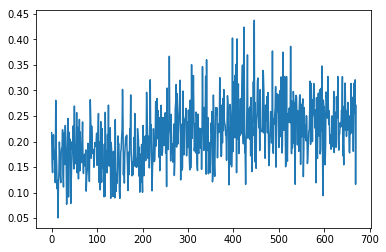

In [0]:
plt.plot(losses);

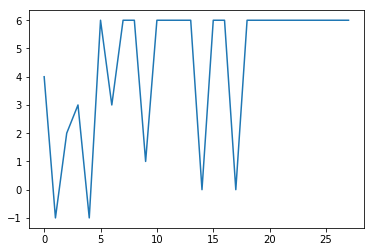

In [0]:
plt.plot(rewards);

## Check the agent in action


In [0]:
test_env = make_env()
test_env = TextWorldPreproc(test_env)
test_agent = DQNAgent(net, prep, epsilon=0, device=device)

In [0]:
total_reward = 0
step_idx = 0
s = test_env.reset()

In [0]:
while True:
    step_idx += 1
    actions, _ = test_agent([s])
    action = actions[0]
    action_text = test_env.last_admissible_commands[action]
    s, r, is_done, _ = test_env.step(action)
    total_reward += r
    print("%d: %s -> reward=%s, total_reward=%s" % (step_idx, action_text, r, total_reward))
    if is_done:
        break

1: unlock gate with keycard -> reward=1, total_reward=1
2: open gate -> reward=1, total_reward=2
3: go east -> reward=1, total_reward=3
4: take cookie from counter -> reward=1, total_reward=4
5: take shadfly from counter -> reward=0, total_reward=4
6: eat cookie -> reward=2, total_reward=6


# Further steps to explore

Lots of!

*  We're feeding one command at a time in our DQN, maybe, [Pointer networks (1506.03134)](https://arxiv.org/abs/1506.03134) will be more suitable model for this. (Pointer Networks is a tweak to attention-based model to produce variable-sized outputs)
*   We've simplified our life a lot with `intermediate_rewards`, can we solve the game without it? (very likely more advanced exploration will be needed)
* Lots of opportunities to check different exploration strategies (curiosity-driven exploration, for example)
* Solve one specific game is boring, by tweaking `TextWorldPreproc` we can combine several games together to sample from different games.
* What about transfer learning? Can we train on one set of games to solve another games?
* We're using `admissible_commands`, which looks like a cheating. Can you train proper command generator?

And, finally, could you train agent to solve zork?
